<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/tensorflow/keras_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Keras to Low Level TensorFlow, Part V: Layers and Training

* https://www.tensorflow.org/guide/keras
* https://keras.io

In [1]:
# import and check version
import tensorflow as tf
# tf can be really verbose
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.12.0


In [2]:
# a small sanity check, does tf seem to work ok? 
sess = tf.Session()
hello = tf.constant('Hello TF!')
print(sess.run(hello))
sess.close()

b'Hello TF!'


In [3]:
import tensorflow.keras as keras
print(keras.__version__)

2.1.6-tf


In [0]:
input = [[-1], [0], [1], [2], [3], [4]]
output = [[2], [1], [0], [-1], [-2], [-3]]

In [5]:
import numpy as np

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Dense(units=1, input_dim=1)
])
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse')

BATCH_SIZE=1
EPOCHS = 500

x = np.array(input)[:, 0]
y = np.array(output)[:, 0]

%time history = model.fit(x=x, y=y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

CPU times: user 8.44 s, sys: 1.32 s, total: 9.77 s
Wall time: 6.29 s


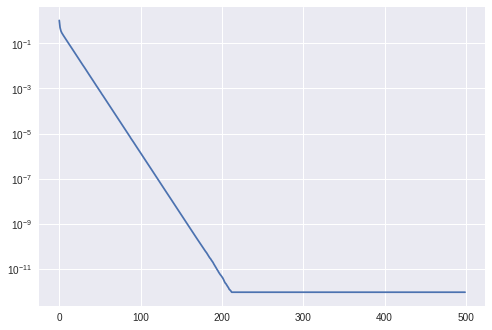

In [6]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.plot(history.history['loss'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.get_weights()

[array([[-0.99999976]], dtype=float32), array([0.99999875], dtype=float32)]

[[ 1.9999986e+00]
 [ 9.9999875e-01]
 [-1.0132790e-06]
 [-1.0000007e+00]
 [-2.0000005e+00]
 [-3.0000002e+00]]


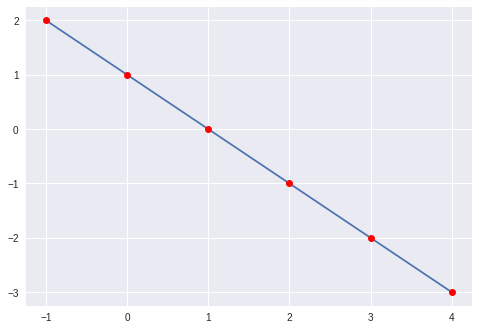

In [9]:
output_pred = model.predict(x)
print(output_pred)
plt.plot(input, output_pred)
plt.plot(input, output, 'ro')